In [1]:
import helper
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, datasets, transforms
from torch import optim

import numpy as np
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.FashionMNIST('f_mnist/',download = False,train = True,transform = transform)
testset = datasets.FashionMNIST('f_mnist/',download = False, train = False, transform = transform)

In [3]:
print(len(trainset))
print(len(testset))

60000
10000


In [4]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 100,shuffle = True)
testloader = torch.utils.data.DataLoader(testset,batch_size = 50,shuffle = True)

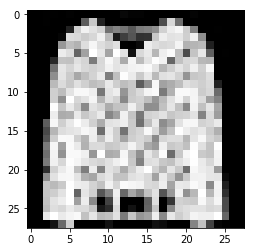

In [5]:
images, labels = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze(),cmap='Greys_r');

In [6]:
# Build network

class net(nn.Module):
    def __init__(self,input_layers,hidden_layers,out_layers):
        super().__init__()
        self.fc1 = nn.Linear(input_layers,hidden_layers[0])
        self.fc2 = nn.Linear(hidden_layers[0],hidden_layers[1])
        self.fc3 = nn.Linear(hidden_layers[1],out_layers)
    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [7]:
model=net(784,[128,64],10)
model

net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


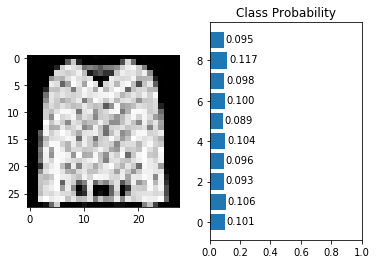

In [8]:
img = images[0]
pred=model.forward(img.view(1,784))
ps=F.softmax(pred)

plt.subplot(1,2,1)
plt.imshow(img.numpy().squeeze(),cmap='Greys_r')

plt.subplot(1,2,2)
plt.barh(range(10),ps.data.numpy().squeeze())
plt.xlim(0,1)
plt.title('Class Probability')
for x,y in enumerate(ps.data.numpy().squeeze()):
    plt.text(y + 0.01, x-0.1, '{:.3f}'.format(y))

In [9]:
# Train the model

loss_f = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

epochs = 4
print_every = 40
steps= 0
running_loss = 0

for e in range(epochs):
    running_loss = 0
    for images,labels in iter(trainloader):
        images.resize_(100,784)
        preds = model.forward(images)
        loss = loss_f(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        steps += 1
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print('Epochs:{}/{}...'.format(e+1,epochs),
                  'Loss:{:.4f}'.format(running_loss/print_every))
            
            running_loss = 0


Epochs:1/4... Loss:2.2455
Epochs:1/4... Loss:2.1065
Epochs:1/4... Loss:1.9036
Epochs:1/4... Loss:1.6601
Epochs:1/4... Loss:1.4504
Epochs:1/4... Loss:1.2871
Epochs:1/4... Loss:1.1454
Epochs:1/4... Loss:1.0260
Epochs:1/4... Loss:0.9539
Epochs:1/4... Loss:0.9063
Epochs:1/4... Loss:0.8744
Epochs:1/4... Loss:0.8353
Epochs:1/4... Loss:0.7903
Epochs:1/4... Loss:0.7864
Epochs:1/4... Loss:0.7316
Epochs:2/4... Loss:0.7118
Epochs:2/4... Loss:0.7026
Epochs:2/4... Loss:0.6964
Epochs:2/4... Loss:0.6671
Epochs:2/4... Loss:0.6809
Epochs:2/4... Loss:0.6654
Epochs:2/4... Loss:0.6459
Epochs:2/4... Loss:0.6409
Epochs:2/4... Loss:0.6380
Epochs:2/4... Loss:0.6139
Epochs:2/4... Loss:0.6155
Epochs:2/4... Loss:0.5836
Epochs:2/4... Loss:0.6144
Epochs:2/4... Loss:0.6123
Epochs:2/4... Loss:0.5932
Epochs:3/4... Loss:0.5728
Epochs:3/4... Loss:0.5967
Epochs:3/4... Loss:0.5707
Epochs:3/4... Loss:0.5873
Epochs:3/4... Loss:0.5997
Epochs:3/4... Loss:0.5348
Epochs:3/4... Loss:0.5533
Epochs:3/4... Loss:0.5499
Epochs:3/4..

In [24]:
dataiter = iter(trainloader)
images,labels= dataiter.next()

img = images[9]
img.resize_(1,784)

pred = model.forward(img)
ps = F.softmax(pred)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


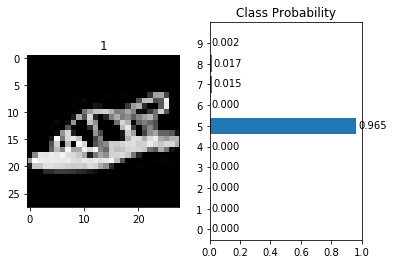

In [25]:
plt.subplot(1,2,1)
plt.imshow(images[9].view(1,28,28).numpy().squeeze(),cmap='Greys_r')
plt.title('{}'.format(labels[0]))

plt.subplot(1,2,2)
plt.barh(range(10),ps.data.numpy().squeeze())
plt.yticks(range(10))
plt.ylim(-0.5,10)
plt.xlim(0,1)
plt.title('Class Probability')
for x,y in enumerate(ps.data.numpy().squeeze()):
    plt.text(y + 0.01, x-0.1, '{:.3f}'.format(y))